In [1]:
# import libraries
import tensorflow as tf
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import Precision, Recall, BinaryAccuracy

In [6]:
os.listdir('data')

['normal', 'pneumonia']

In [7]:
# try read image with opencv
img = cv2.imread(os.path.join('data', 'normal', 'NORMAL2-IM-1257-0001.jpeg'))
img.shape

(2583, 2916, 3)

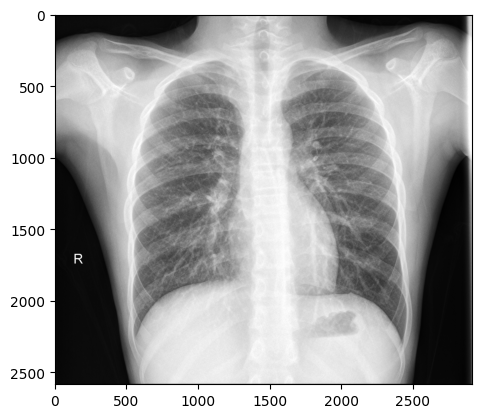

In [14]:
# try plotting
plt.imshow(img)
plt.show()

In [42]:
# load dataset
data = tf.keras.utils.image_dataset_from_directory('data', image_size=(224,224))

Found 2916 files belonging to 2 classes.


In [43]:
iterate_data = data.as_numpy_iterator()

In [44]:
batch = iterate_data.next()

In [45]:
batch[0].shape

(32, 224, 224, 3)

In [20]:
batch[1]

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [48]:
# preprocess the data scaling
# make the maximum value = 1 and minimum value = 0
data = data.map(lambda x, y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [49]:
iterate_scale = data.as_numpy_iterator()

In [50]:
batch = iterate_scale.next()

In [51]:
batch[0].max()

1.0

In [12]:
# splitting data
train_size = int(len(data)*.7)
test_size = int(len(data)*.3)+1

In [106]:
# total batches
print(len(data))

# check if splitting data total is also 92 batches
print(train_size + test_size)

92
92


In [13]:
# take the batches
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [31]:
# import VGG16 Model
model_vgg = VGG16(input_shape=[224, 224, 3], weights='imagenet', include_top=False)

In [32]:
for each_layer in model_vgg.layers:
    each_layer.trainable = False

In [33]:
from glob import glob
classes = glob('data/*')
len(classes)

2

In [34]:
# flattening layer
flatten_layer = Flatten()(model_vgg.output)
predict = Dense(1, activation='sigmoid')(flatten_layer)
model = Model(inputs=model_vgg.input, outputs=predict)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [35]:
# compile model with adam optimizer
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
# train model
log = 'logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log)

In [38]:
hist = model.fit(train, epochs=30, validation_data=test, callbacks=[tensorboard_callback])

Epoch 1/30
64/64 [==============================] - 471s 7s/step - loss: 0.3498 - accuracy: 0.8379 - val_loss: 0.2174 - val_accuracy: 0.9240
Epoch 2/30
64/64 [==============================] - 355s 6s/step - loss: 0.1729 - accuracy: 0.9399 - val_loss: 0.1708 - val_accuracy: 0.9320
Epoch 3/30
64/64 [==============================] - 300s 5s/step - loss: 0.1402 - accuracy: 0.9492 - val_loss: 0.1651 - val_accuracy: 0.9286
Epoch 4/30
64/64 [==============================] - 370s 6s/step - loss: 0.1123 - accuracy: 0.9634 - val_loss: 0.1600 - val_accuracy: 0.9274
Epoch 5/30
64/64 [==============================] - 393s 6s/step - loss: 0.1036 - accuracy: 0.9653 - val_loss: 0.1491 - val_accuracy: 0.9459
Epoch 6/30
64/64 [==============================] - 384s 6s/step - loss: 0.1056 - accuracy: 0.9624 - val_loss: 0.1637 - val_accuracy: 0.9401
Epoch 7/30
64/64 [==============================] - 414s 6s/step - loss: 0.0888 - accuracy: 0.9717 - val_loss: 0.1269 - val_accuracy: 0.9447
Epoch 8/30
64

In [39]:
# save model
model.save(os.path.join('models', 'pneumoniadetectionvgg16.h5'))

In [3]:
# load model
new_model = load_model(os.path.join('models', 'pneumoniadetectionvgg16.h5'))

In [67]:
import pandas as pd
pd.DataFrame(hist.history)

,loss,accuracy,val_loss,val_accuracy
0,0.349777,0.837891,0.217436,0.923963
1,0.172931,0.939941,0.170838,0.932028
2,0.140224,0.949219,0.165103,0.928571
3,0.112275,0.963379,0.160002,0.927419
4,0.103622,0.965332,0.149095,0.945853
5,0.105600,0.962402,0.163750,0.940092
6,0.088834,0.971680,0.126897,0.944700
7,0.083736,0.970703,0.121580,0.945853
8,0.066604,0.980957,0.121394,0.947005
9,0.058112,0.983887,0.116713,0.947005


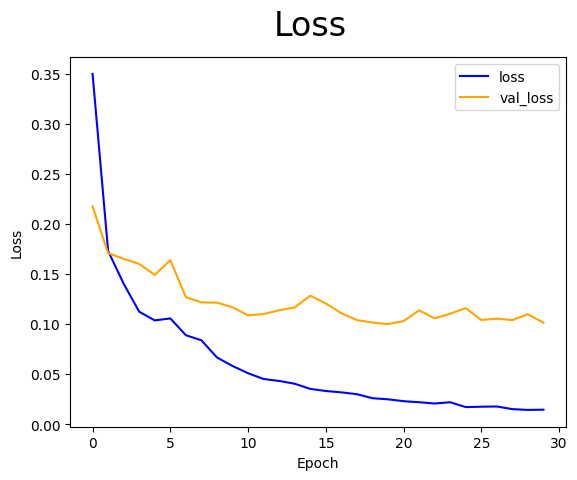

In [61]:
# plot performance loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=24)
plt.legend(loc="upper right")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

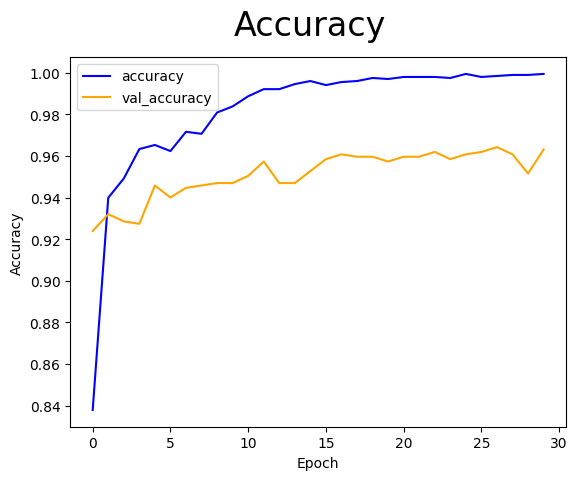

In [60]:
# plot performance accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=24)
plt.legend(loc="upper left")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [45]:
# evaluate performance
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [49]:
# predictions
for batch in test.as_numpy_iterator():
    x, y = batch
    y_predict = new_model.predict(x)
    precision.update_state(y, y_predict)
    recall.update_state(y, y_predict)
    accuracy.update_state(y, y_predict)

1/1 [==============================] - 1s 523ms/step


In [52]:
print(f'Precision: {precision.result().numpy()}')
print(f'Recall: {recall.result().numpy()}')
print(f'Accuracy: {accuracy.result().numpy()}')

Precision: 0.9682899117469788
Recall: 0.977142870426178
Accuracy: 0.9723502397537231


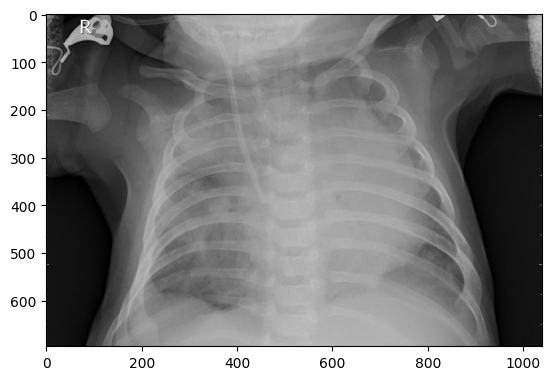

1/1 [==============================] - 0s 241ms/step
Probability : 0.99999714
You have been infected in pneumonia disease!


In [14]:
# test the model (implementation)
img = cv2.imread('test/pneumoniatest/person100_bacteria_482.jpeg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (224, 224))
# plt.imshow(resize.numpy().astype(int))
# plt.show()
y_predict_test = new_model.predict(np.expand_dims(resize/255, 0))
print("Probability :", y_predict_test[0][0])
if y_predict_test > 0.5:
    print('You have been infected in pneumonia disease!')
else:
    print('You are healthy!')